# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Importing Dataset

In [2]:
train_data=pd.read_csv(r"train.csv")
test_data=pd.read_csv(r"test.csv")

# Preprocessing Training Data

In [3]:
train_data.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [4]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print(train_data.shape)
print(test_data.shape)

(614, 13)
(367, 12)


In [7]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Encoding Categorical Data

In [8]:
train_data["Gender"]=le.fit_transform(train_data["Gender"])
train_data["Self_Employed"]=le.fit_transform(train_data["Self_Employed"])
train_data["Dependents"]=le.fit_transform(train_data["Dependents"])
train_data["Married"]=le.fit_transform(train_data["Married"])
train_data["Property_Area"]=le.fit_transform(train_data["Property_Area"])
train_data["Education"]=le.fit_transform(train_data["Education"])
train_data["Loan_Status"]=le.fit_transform(train_data["Loan_Status"])

In [9]:
train_data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [10]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### Filling NULL Values

In [11]:
train_data["Gender"].fillna(train_data["Gender"].mode()[0])
train_data["Married"].fillna(train_data["Married"].mode()[0])
train_data['Dependents'].fillna(train_data["Dependents"].mode()[0])
train_data["Self_Employed"].fillna(train_data["Self_Employed"].mode()[0])
train_data["Credit_History"]=train_data["Credit_History"].fillna(train_data["Credit_History"].mode()[0])

In [12]:
train_data["Loan_Amount_Term"]=train_data["Loan_Amount_Term"].fillna(train_data["Loan_Amount_Term"].mode()[0])

In [13]:
train_data["LoanAmount"]=train_data["LoanAmount"].fillna(train_data["LoanAmount"].median())

In [14]:
train_data["Total_Income"]=train_data["ApplicantIncome"]+train_data["CoapplicantIncome"]

In [15]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


In [16]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [17]:
train_data.shape

(614, 14)

In [18]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

# Preprocessing Test Data

In [19]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [20]:
test_data.shape

(367, 12)

In [21]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Encoding The Categorical Data

In [22]:
test_data["Gender"]=le.fit_transform(test_data["Gender"])
test_data["Self_Employed"]=le.fit_transform(test_data["Self_Employed"])
test_data["Dependents"]=le.fit_transform(test_data["Dependents"])
test_data["Married"]=le.fit_transform(test_data["Married"])
test_data["Property_Area"]=le.fit_transform(test_data["Property_Area"])
test_data["Education"]=le.fit_transform(test_data["Education"])

### Filling The NULL Values

In [23]:
test_data["Gender"].fillna(test_data["Gender"].mode()[0])
test_data["Married"].fillna(test_data["Married"].mode()[0])
test_data['Dependents'].fillna(test_data["Dependents"].mode()[0])
test_data["Self_Employed"].fillna(test_data["Self_Employed"].mode()[0])
test_data["Credit_History"]=test_data["Credit_History"].fillna(test_data["Credit_History"].mode()[0])

In [24]:
test_data["Loan_Amount_Term"]=test_data["Loan_Amount_Term"].fillna(test_data["Loan_Amount_Term"].mode()[0])

In [25]:
test_data["LoanAmount"]=test_data["LoanAmount"].fillna(test_data["LoanAmount"].median())

In [26]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [27]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Visiualizing Training Data

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

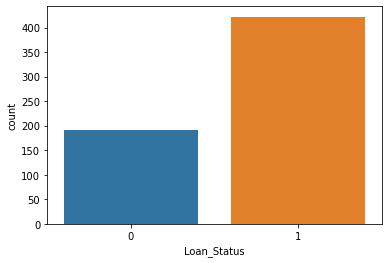

In [28]:
sns.countplot(train_data["Loan_Status"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

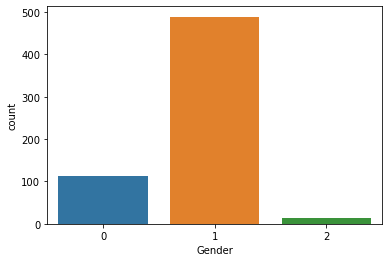

In [29]:
sns.countplot(train_data["Gender"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

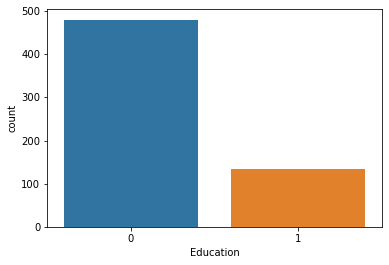

In [30]:
sns.countplot(train_data["Education"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

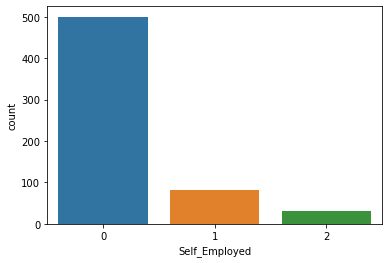

In [31]:
sns.countplot(train_data["Self_Employed"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

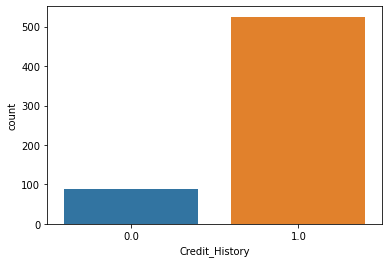

In [32]:
sns.countplot(train_data["Credit_History"])

<AxesSubplot:ylabel='None'>

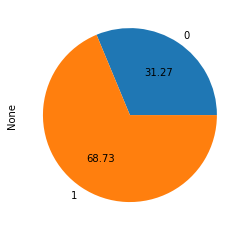

In [33]:
train_data.groupby('Loan_Status').size().plot(kind='pie', autopct='%.2f')

In [34]:
train_data["Property_Area"].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [35]:
train_data=train_data.drop(["ApplicantIncome","CoapplicantIncome"], axis=1)

<AxesSubplot:>

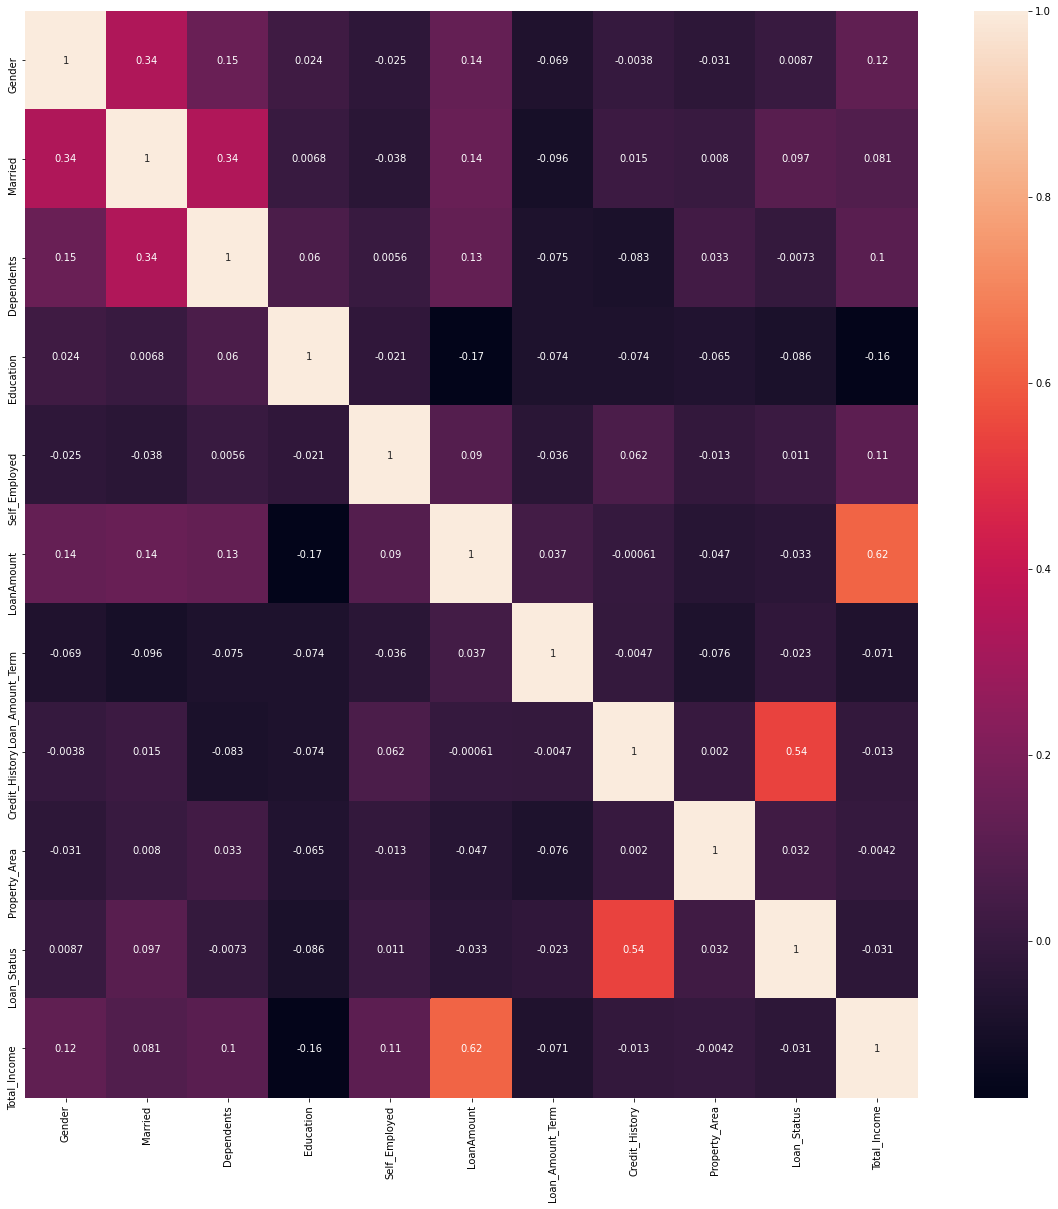

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True)

In [37]:
y=train_data['Loan_Status']


In [38]:
y.shape

(614,)

In [39]:
train_data=train_data.drop(['Loan_Status','Loan_ID'],axis=1)


In [40]:
train_data.shape

(614, 10)

## Splitting The DataSet Without SMOTE

In [41]:
train_x,test_x,train_y,test_y=train_test_split(train_data,y,random_state=555,test_size=0.3)

In [42]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(429, 10)
(185, 10)
(429,)
(185,)


### Using Random Forest Classifier

In [43]:
rf=RandomForestClassifier()
rf.fit(train_x,train_y)
pred=rf.predict(test_x)
accuracy_rf=metrics.accuracy_score(test_y,pred)
print("The confussion metrix for Random forest is:\n",metrics.confusion_matrix(test_y,pred))
print("The accuracy of Random Forest Classifier is:\t\t",metrics.accuracy_score(test_y,pred))
print("The recal score of Random Forest Classifier is:\t\t",metrics.recall_score(test_y,pred))
print("The precision of Random Forest Classifier is:\t\t",metrics.precision_score(test_y,pred))
print("The f1 score of Random Forest Classifier is:\t\t",metrics.f1_score(test_y,pred))

The confussion metrix for Random forest is:
 [[ 33  28]
 [  8 116]]
The accuracy of Random Forest Classifier is:		 0.8054054054054054
The recal score of Random Forest Classifier is:		 0.9354838709677419
The precision of Random Forest Classifier is:		 0.8055555555555556
The f1 score of Random Forest Classifier is:		 0.8656716417910448


### Using Decision Tree Classifier

In [44]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
pred_dtc=dtc.predict(test_x)
accuracy_dsc=metrics.accuracy_score(test_y,pred_dtc)
print("The confussion metrix for Decision Tree is:\n",metrics.confusion_matrix(test_y,pred_dtc))
print("The accuracy of Decision Tree Classifier is:\t\t",accuracy_dsc)
print("The recal score of Decision Tree Classifier is:\t\t",metrics.recall_score(test_y,pred_dtc))
print("The precision of Decision Tree Classifier is:\t\t",metrics.precision_score(test_y,pred_dtc))
print("The f1 score of Decision Tree Classifier is:\t\t",metrics.f1_score(test_y,pred_dtc))

The confussion metrix for Decision Tree is:
 [[ 36  25]
 [ 24 100]]
The accuracy of Decision Tree Classifier is:		 0.7351351351351352
The recal score of Decision Tree Classifier is:		 0.8064516129032258
The precision of Decision Tree Classifier is:		 0.8
The f1 score of Decision Tree Classifier is:		 0.8032128514056225


### Using Logistic Regression

In [45]:
lr=LogisticRegression(max_iter=5000)
lr.fit(train_x,train_y)
pred_lr=lr.predict(test_x)
accuracy_lr=metrics.accuracy_score(test_y,pred_lr)
print("The confussion metrix for Logistic Regression is:\n",metrics.confusion_matrix(test_y,pred_lr))
print("The accuracy of Logistic Regression is:\t\t",accuracy_lr)
print("The recal score Logistic Regression is:\t\t",metrics.recall_score(test_y,pred_lr))
print("The precision Logistic Regression is:\t\t",metrics.precision_score(test_y,pred_lr))
print("The f1 score Logistic Regression is:\t\t",metrics.f1_score(test_y,pred_lr))

The confussion metrix for Logistic Regression is:
 [[ 28  33]
 [  5 119]]
The accuracy of Logistic Regression is:		 0.7945945945945946
The recal score Logistic Regression is:		 0.9596774193548387
The precision Logistic Regression is:		 0.7828947368421053
The f1 score Logistic Regression is:		 0.8623188405797102


### Using AdaBoost Classifier

In [46]:
ada=AdaBoostClassifier()
ada.fit(train_x,train_y)
pred_ada=ada.predict(test_x)
accuracy_ada=metrics.accuracy_score(test_y,pred_ada)
print("The confussion metrix for AdaBoost is:\n",metrics.confusion_matrix(test_y,pred_ada))
print("The accuracy of AdaBoost Classifier is:\t\t",accuracy_ada)
print("The recal score of AdaBoost Classifier is is:\t\t",metrics.recall_score(test_y,pred_ada))
print("The precision of AdaBoost Classifier is:\t\t",metrics.precision_score(test_y,pred_ada))
print("The f1 score of AdaBoost Classifier is:\t\t",metrics.f1_score(test_y,pred_ada))

The confussion metrix for AdaBoost is:
 [[ 33  28]
 [ 14 110]]
The accuracy of AdaBoost Classifier is:		 0.772972972972973
The recal score of AdaBoost Classifier is is:		 0.8870967741935484
The precision of AdaBoost Classifier is:		 0.7971014492753623
The f1 score of AdaBoost Classifier is:		 0.8396946564885496


### Using KNN classifier

In [47]:
kn=KNeighborsClassifier()
kn.fit(train_x,train_y)
pred_kn=kn.predict(test_x)
accuracy_knn=metrics.accuracy_score(test_y,pred_kn)
print("The confussion metrix for KNN Classifier is:\n",metrics.confusion_matrix(test_y,pred_kn))
print("The accuracy of KNN Classifier is:\t\t",accuracy_knn)
print("The recal score of KNN Classifier is is:\t\t",metrics.recall_score(test_y,pred_kn))
print("The precision of KNN Classifier is:\t\t",metrics.precision_score(test_y,pred_kn))
print("The f1 score of KNN Classifier is:\t\t",metrics.f1_score(test_y,pred_kn))

The confussion metrix for KNN Classifier is:
 [[  6  55]
 [ 18 106]]
The accuracy of KNN Classifier is:		 0.6054054054054054
The recal score of KNN Classifier is is:		 0.8548387096774194
The precision of KNN Classifier is:		 0.6583850931677019
The f1 score of KNN Classifier is:		 0.743859649122807


### Using SVC

In [48]:
svc=SVC()
svc.fit(train_x,train_y)
pred_svc=svc.predict(test_x)
accuracy_svm=metrics.accuracy_score(test_y,pred_svc)
print("The confussion metrix for SVM Classifier is:\n",metrics.confusion_matrix(test_y,pred_svc))
print("The accuracy of SVM Classifier is:\t\t",accuracy_svm)
print("The recal score of SVM Classifier is is:\t\t",metrics.recall_score(test_y,pred_svc))
print("The precision of SVM Classifier is:\t\t",metrics.precision_score(test_y,pred_svc))
print("The f1 score of SVM Classifier is:\t\t",metrics.f1_score(test_y,pred_svc))

The confussion metrix for SVM Classifier is:
 [[  0  61]
 [  0 124]]
The accuracy of SVM Classifier is:		 0.6702702702702703
The recal score of SVM Classifier is is:		 1.0
The precision of SVM Classifier is:		 0.6702702702702703
The f1 score of SVM Classifier is:		 0.8025889967637541


Text(0.5, 1.0, 'Comparision of Models based on  their ACCURACY')

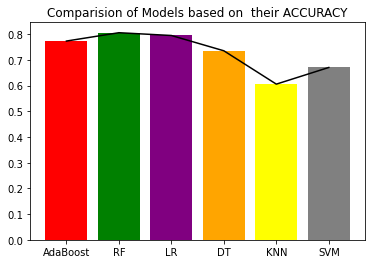

In [49]:
plt.bar(['AdaBoost','RF','LR','DT','KNN','SVM'],[accuracy_ada,accuracy_rf,accuracy_lr,accuracy_dsc,accuracy_knn,accuracy_svm],color=['red','green','purple','orange','yellow','grey'])
plt.plot([accuracy_ada,accuracy_rf,accuracy_lr,accuracy_dsc,accuracy_knn,accuracy_svm],color='black')
plt.title('Comparision of Models based on  their ACCURACY')

# Using SMOTE

In [50]:
smote=SMOTE()
balanced_x,balanced_y=smote.fit_resample(train_data,y)
print(balanced_x.shape)
print(balanced_y.shape)

(844, 10)
(844,)


In [51]:
balanced_y.value_counts()

0    422
1    422
Name: Loan_Status, dtype: int64

## Splitting The DataSet

In [52]:
train_bx,test_bx,train_by,test_by=train_test_split(balanced_x,balanced_y,random_state=555,test_size=0.3)

In [53]:
print(train_bx.shape)
print(test_bx.shape)
print(train_by.shape)
print(test_by.shape)

(590, 10)
(254, 10)
(590,)
(254,)


### Using Random Forest Classifer

In [54]:
brf=RandomForestClassifier()
brf.fit(train_bx,train_by)
bpred=brf.predict(test_bx)
accuracy_brf=metrics.accuracy_score(test_by,bpred)
print("The confussion metrix for Random forest is:\n",metrics.confusion_matrix(test_by,bpred))
print("The accuracy of Random Forest Classifier is:\t\t",metrics.accuracy_score(test_by,bpred))
print("The recal score of Random Forest Classifier is:\t\t",metrics.recall_score(test_by,bpred))
print("The precision of Random Forest Classifier is:\t\t",metrics.precision_score(test_by,bpred))
print("The f1 score of Random Forest Classifier is:\t\t",metrics.f1_score(test_by,bpred))

The confussion metrix for Random forest is:
 [[ 99  29]
 [ 19 107]]
The accuracy of Random Forest Classifier is:		 0.8110236220472441
The recal score of Random Forest Classifier is:		 0.8492063492063492
The precision of Random Forest Classifier is:		 0.7867647058823529
The f1 score of Random Forest Classifier is:		 0.8167938931297709


### Using Decision Tree Classifier

In [55]:
bdtc=DecisionTreeClassifier()
bdtc.fit(train_bx,train_by)
bpred_dtc=bdtc.predict(test_bx)
accuracy_bdsc=metrics.accuracy_score(test_by,bpred_dtc)
print("The confussion metrix for Decision Tree is:\n",metrics.confusion_matrix(test_by,bpred_dtc))
print("The accuracy of Decision Tree Classifier is:\t\t",accuracy_bdsc)
print("The recal score of Decision Tree Classifier is:\t\t",metrics.recall_score(test_by,bpred_dtc))
print("The precision of Decision Tree Classifier is:\t\t",metrics.precision_score(test_by,bpred_dtc))
print("The f1 score of Decision Tree Classifier is:\t\t",metrics.f1_score(test_by,bpred_dtc))

The confussion metrix for Decision Tree is:
 [[105  23]
 [ 34  92]]
The accuracy of Decision Tree Classifier is:		 0.7755905511811023
The recal score of Decision Tree Classifier is:		 0.7301587301587301
The precision of Decision Tree Classifier is:		 0.8
The f1 score of Decision Tree Classifier is:		 0.7634854771784233


### Using  Logistic Regression

In [56]:
blr=LogisticRegression(max_iter=5000)
blr.fit(train_bx,train_by)
bpred_lr=blr.predict(test_bx)
accuracy_blr=metrics.accuracy_score(test_by,bpred_lr)
print("The confussion metrix for Logistic Regression is:\n",metrics.confusion_matrix(test_by,bpred_lr))
print("The accuracy of Logistic Regression is:\t\t",accuracy_blr)
print("The recal score Logistic Regression is:\t\t",metrics.recall_score(test_by,bpred_lr))
print("The precision Logistic Regression is:\t\t",metrics.precision_score(test_by,bpred_lr))
print("The f1 score Logistic Regression is:\t\t",metrics.f1_score(test_by,bpred_lr))

The confussion metrix for Logistic Regression is:
 [[ 82  46]
 [ 12 114]]
The accuracy of Logistic Regression is:		 0.7716535433070866
The recal score Logistic Regression is:		 0.9047619047619048
The precision Logistic Regression is:		 0.7125
The f1 score Logistic Regression is:		 0.7972027972027972


### Using AdaBoost Classifier

In [57]:
bada=AdaBoostClassifier()
bada.fit(train_bx,train_by)
bpred_ada=bada.predict(test_bx)
accuracy_bada=metrics.accuracy_score(test_by,bpred_ada)
print("The confussion metrix for AdaBoost is:\n",metrics.confusion_matrix(test_by,bpred_ada))
print("The accuracy of AdaBoost Classifier is:\t\t",accuracy_bada)
print("The recal score of AdaBoost Classifier is is:\t\t",metrics.recall_score(test_by,bpred_ada))
print("The precision of AdaBoost Classifier is:\t\t",metrics.precision_score(test_by,bpred_ada))
print("The f1 score of AdaBoost Classifier is:\t\t",metrics.f1_score(test_by,bpred_ada))

The confussion metrix for AdaBoost is:
 [[ 94  34]
 [ 15 111]]
The accuracy of AdaBoost Classifier is:		 0.8070866141732284
The recal score of AdaBoost Classifier is is:		 0.8809523809523809
The precision of AdaBoost Classifier is:		 0.7655172413793103
The f1 score of AdaBoost Classifier is:		 0.8191881918819187


### Using KNN Classifier

In [58]:
bkn=KNeighborsClassifier()
bkn.fit(train_bx,train_by)
bpred_kn=kn.predict(test_bx)
accuracy_bknn=metrics.accuracy_score(test_by,bpred_kn)
print("The confussion metrix for KNN Classifier is:\n",metrics.confusion_matrix(test_by,bpred_kn))
print("The accuracy of KNN Classifier is:\t\t",accuracy_bknn)
print("The recal score of KNN Classifier is is:\t\t",metrics.recall_score(test_by,bpred_kn))
print("The precision of KNN Classifier is:\t\t",metrics.precision_score(test_by,bpred_kn))
print("The f1 score of KNN Classifier is:\t\t",metrics.f1_score(test_by,bpred_kn))

The confussion metrix for KNN Classifier is:
 [[ 32  96]
 [ 11 115]]
The accuracy of KNN Classifier is:		 0.5787401574803149
The recal score of KNN Classifier is is:		 0.9126984126984127
The precision of KNN Classifier is:		 0.5450236966824644
The f1 score of KNN Classifier is:		 0.6824925816023738


### Using SVC

In [59]:
bsvc=SVC()
bsvc.fit(train_bx,train_by)
bpred_svc=bsvc.predict(test_bx)
accuracy_bsvm=metrics.accuracy_score(test_by,bpred_svc)
print("The confussion metrix for SVM Classifier is:\n",metrics.confusion_matrix(test_by,bpred_svc))
print("The accuracy of SVM Classifier is:\t\t",accuracy_bsvm)
print("The recal score of SVM Classifier is is:\t\t",metrics.recall_score(test_by,bpred_svc))
print("The precision of SVM Classifier is:\t\t",metrics.precision_score(test_by,bpred_svc))
print("The f1 score of SVM Classifier is:\t\t",metrics.f1_score(test_by,bpred_svc))

The confussion metrix for SVM Classifier is:
 [[42 86]
 [43 83]]
The accuracy of SVM Classifier is:		 0.4921259842519685
The recal score of SVM Classifier is is:		 0.6587301587301587
The precision of SVM Classifier is:		 0.4911242603550296
The f1 score of SVM Classifier is:		 0.5627118644067798


Text(0.5, 1.0, 'Comparision of Models based on  their ACCURACY while using SMOTE')

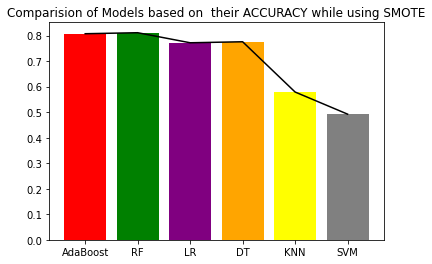

In [60]:
plt.bar(['AdaBoost','RF','LR','DT','KNN','SVM'],[accuracy_bada,accuracy_brf,accuracy_blr,accuracy_bdsc,accuracy_bknn,accuracy_bsvm],color=['red','green','purple','orange','yellow','grey'])
plt.plot([accuracy_bada,accuracy_brf,accuracy_blr,accuracy_bdsc,accuracy_bknn,accuracy_bsvm],color='black')
plt.title('Comparision of Models based on  their ACCURACY while using SMOTE')